### Import Dependencies

In [7]:
import numpy as np 
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### Read Dataset

In [8]:
data = pd.read_csv('../reduced.csv')
data.drop('Index', axis=1, inplace=True)
data.head()

,0,7,13,14,17,33,37,39,40,46,...,387,388,390,398,402,405,409,415,466,labels
0,0.156041,0.290654,0.199809,0.290295,0.356657,0.307132,0.157192,0.187702,0.217832,0.374565,...,0.309477,0.318458,0.295038,0.212476,0.284568,0.338188,0.244253,0.234073,0.323322,0
1,0.099105,0.332776,0.119696,0.208098,0.258650,0.352134,0.101318,0.130601,0.152025,0.427157,...,0.343032,0.350165,0.319125,0.251888,0.207328,0.249380,0.196100,0.174136,0.353529,0
2,0.160259,0.224147,0.209884,0.213498,0.264495,0.233589,0.151807,0.161886,0.180539,0.275579,...,0.364269,0.375077,0.351450,0.293468,0.241386,0.285400,0.268769,0.265217,0.382837,0
3,0.139705,0.330197,0.172731,0.188332,0.243490,0.348977,0.137025,0.159584,0.179181,0.438886,...,0.341322,0.349891,0.321454,0.252637,0.197635,0.243881,0.215141,0.200392,0.354787,0
4,0.144930,0.312308,0.172522,0.174161,0.215116,0.328316,0.152421,0.181887,0.210446,0.382999,...,0.197266,0.195961,0.176641,0.165296,0.164141,0.196522,0.158438,0.156289,0.194182,0


### Split Variables

In [9]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Training

In [10]:
knn = KNeighborsClassifier(metric='euclidean', n_neighbors=19, weights='distance')
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=19, weights='distance')

In [11]:
pred = knn.predict(x_test)

In [12]:
accuracy_score(y_test, pred)

0.45553846153846156

### Get confusion matrix

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

confusion_matrix(y_test, pred)

array([[ 178,   70,  200,  223,  117,   53],
       [  40,  202,  177,  229,  171,   87],
       [  65,   73, 1163,  226,  117,   97],
       [  62,   84,  169,  636,  194,   54],
       [  66,   99,  189,  331,  353,   37],
       [  18,   57,   98,  100,   36,  429]], dtype=int64)

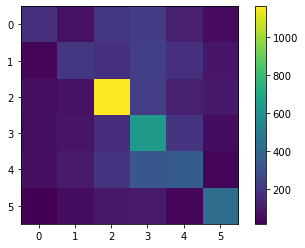

In [17]:
plt.imshow(confusion_matrix(y_test, pred))
plt.colorbar()

### Get the recall 

In [13]:
from sklearn.metrics import recall_score
recall_score(y_test, pred, average=None)

array([0.21165279, 0.22295806, 0.66800689, 0.53044204, 0.32837209,
       0.58130081])

### Get precision

In [14]:
from sklearn.metrics import precision_score
precision_score(y_test, pred, average=None)

array([0.41491841, 0.34529915, 0.58266533, 0.36446991, 0.35728745,
       0.5667107 ])

### F1 score

In [15]:
from sklearn.metrics import f1_score
f1_score(y_test, pred, average=None)

array([0.28031496, 0.27095909, 0.6224244 , 0.43206522, 0.34222007,
       0.57391304])